In [1]:
from TradeGenerator import *
import matplotlib.pyplot as plt

In [2]:

t = TradeGenerator()
tList = t.prepareTradeList(100)
df = t.tradeListConvert2DataFrame(tList)

In [3]:
df["total"]=df["price"] * df["quantity"]

In [4]:
from datetime import date

In [5]:
df.columns

Index(['cust', 'orgType', 'price', 'quantity', 'secid', 'tradeId', 'total'], dtype='object')

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
from IPython.core.debugger import set_trace

class CategoryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, attribute): # no *args or **kargs
        self.attribute = attribute
    def fit(self, X):
        return self  # nothing else to do
    def transform(self, X, y=None):
        #set_trace()
        _encoded, _categories = X[self.attribute].factorize()
        self.categoriesIndex = _categories
        X[self.attribute+"_cat"] = _encoded
        X.drop(self.attribute,axis=1 ,inplace=True)
        return X
        

In [7]:
OrgTypeCategoryEncoder = CategoryEncoder("orgType")
CustCategoryEncoder = CategoryEncoder("cust")
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('OrgType', OrgTypeCategoryEncoder),
        ('Cust', CustCategoryEncoder)
    ])

In [8]:
newdf=num_pipeline.fit_transform(df)

In [9]:
newdf=newdf.drop("tradeId",axis=1)

In [10]:
OrgTypeCategoryEncoder.categoriesIndex

Index(['Gov', 'restaurant', 'energy', 'tech', 'airline'], dtype='object')

In [11]:
ThreeClassesSet=newdf[(newdf["orgType_cat"] == 0) | (newdf["orgType_cat"] == 2) | (newdf["orgType_cat"] == 4) ]

In [12]:
data = np.zeros((len(CustCategoryEncoder.categoriesIndex),3), dtype=np.float32)

for c in range(len(CustCategoryEncoder.categoriesIndex)):
    custThreeClassesSet=ThreeClassesSet[ThreeClassesSet["cust_cat"] == c]
    
    data[c,0]= np.sum(custThreeClassesSet[custThreeClassesSet["orgType_cat"]==0]["total"])/1000000
    data[c,1] = np.sum(custThreeClassesSet[custThreeClassesSet["orgType_cat"]==2]["total"])/1000000
    data[c,2] = np.sum(custThreeClassesSet[custThreeClassesSet["orgType_cat"]==4]["total"])/1000000
    

In [13]:
ThreeClassesSet.columns

Index(['price', 'quantity', 'secid', 'total', 'orgType_cat', 'cust_cat'], dtype='object')

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(data)

In [15]:
ll=pd.DataFrame(kmeans.labels_)

In [16]:
kmeans.cluster_centers_

array([[ 38060.98046875,   2289.046875  ,   6090.62939453],
       [ 43527.94921875,   5205.45458984,   1999.14672852],
       [ 43483.2109375 ,   1720.30322266,   1327.0300293 ],
       [ 39305.515625  ,   2844.9140625 ,   1238.21960449],
       [ 47333.0390625 ,   2205.52099609,   1853.06640625],
       [ 39839.015625  ,   6873.83398438,    436.09020996]], dtype=float32)

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

def plot3DCluster(kmeans,data):
    ll=pd.DataFrame(kmeans.labels_)
    numOfCluster = kmeans.n_clusters
    
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, numOfCluster))
    for c in range(0,numOfCluster):
        d = data[ll[0]==c]
        ax.scatter(d[:,0],d[:,1],d[:,2],c=colors[c])
        
    # rotate the axes and update
    ax.set_xlabel("Gov", fontsize=14)
    ax.set_ylabel("tech", fontsize=14)
    ax.set_zlabel("restaurant", fontsize=14)
    plt.show()

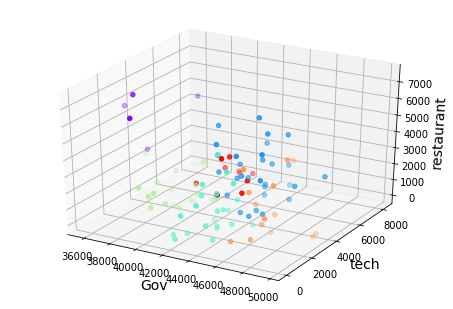

In [18]:
plot3DCluster(kmeans,data)

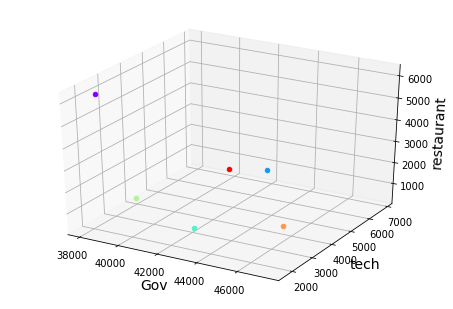

In [19]:
    fig = plt.figure()
    ax = Axes3D(fig)
    numOfCluster = kmeans.n_clusters
    colors = cm.rainbow(np.linspace(0, 1, numOfCluster))
    for c in range(0,numOfCluster):
        d = kmeans.cluster_centers_[c]
        ax.scatter(d[0],d[1],d[2],c=colors[c])
        
    # rotate the axes and update
    ax.set_xlabel("Gov", fontsize=14)
    ax.set_ylabel("tech", fontsize=14)
    ax.set_zlabel("restaurant", fontsize=14)
    plt.show()

In [20]:
[kmeans.cluster_centers_[c]][0]

array([ 39839.015625  ,   6873.83398438,    436.09020996], dtype=float32)

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot2DCluster(kmeans,data):
    ll=pd.DataFrame(kmeans.labels_)
    numOfCluster = kmeans.n_clusters
    
    fig = plt.figure()
    colors = cm.rainbow(np.linspace(0, 1, numOfCluster))
    for c in range(0,numOfCluster):
        d = data[ll[0]==c]
        plt.scatter(d[:,0],d[:,1],c=colors[c])
        
    # rotate the axes and update
    plt.xlabel("Gov", fontsize=14)
    plt.ylabel("tech", fontsize=14)
    #ax.set_zlabel("restaurant", fontsize=14)
    plt.show()

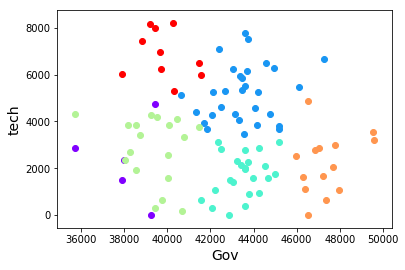

In [25]:
plot2DCluster(kmeans,data)